# Introduction to Data Science 2022

# Week 5

## Exercise 1 | Privacy and data protection

First, look up the [European Data Protection Regulation](http://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R0679&from=en) (“GDPR”). Note that Articles 1-99 start on p. 32 of the document. We will refer to the articles and their parts by, e.g., “Art 6 (1) a) GDPR” which means Article 6 (“Lawfulness of processing”), first paragraph, item a in the GDPR.

1. Valid Consent?

    Find a service you use to which you have given *consent* for the processing of your personal data (Art 6 (1) a) GDPR). Have a look at the privacy notices, policies, or settings of this service.

    - Are the basic legal conditions for this consent in your opinion in line with the new requirements and conditions set by the GDPR?

    - You should provide an answer with justification based on the GDPR, where you refer to specific articles and paragraphs.

2. Your Right to Access your Personal Data

    You have the right to know if personal data about you is processed by a controller. You also have the right to get access to, for example, the processing purposes, the data categories, data transfers, and duration of storage.

    - Find the relevant parts in GDPR and study your rights as a “data subject”.

    - File a right-to-access request with a data processing service of your choosing. Describe the mechanism that is put in place by the service to enable you to exercise this right (if any).

    - Whether you get a response or not, think about how well your rights as a data subject are respected in practice. Your answer should again refer to specific articles and paragraphs of the GDPR.

3. Anonymisation & Pseudonymisation

    - What is the difference between anonymisation and pseudonymisation of personal data?

**Submit your findings in a PDF file, just a short report is enough.**

## Exercise 2 | Fairness-aware AI

This template generates data about the working hours and salaries of n=5000 people. The salary equals 100 x working hours plus/minus normal distributed noise. If you run the template, it produces an _hours_ vs _monthly salary_ scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red).

A linear regression model (see the next code cell) that only includes the working hours as a covariate *without* the protected characteristic (gender) should have slope close to 100.0.

In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [51]:
# THE ORIGINAL CASE

#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n)

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

ORIGINAL: slope: 99.8, figure: see in pdf file

In [52]:
# a) the salary of women is reduced by 200 euros ("direct discrimination")

#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary for women
w_sal = hrs[gen == 1] * np.random.normal(100, 10, size=(gen == 1).sum()) - 200

# salary for men
m_sal = hrs[gen == 0] * np.random.normal(100, 10, size=(gen == 0).sum())

# salaries together
sal = np.concatenate((w_sal, m_sal))

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

A: slope: -1.9, figure: see in pdf file

In [53]:
# b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45),
# no changes in per-hour salary ("no discrimination")

#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours for women
w_hrs = np.random.binomial(60, 0.45, size=(gen == 1).sum())

# work hours for men
m_hrs = np.random.binomial(60, 0.55, size=(gen == 0).sum())

# work hours together
hrs = np.concatenate((w_hrs, m_hrs))

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n)

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})


B: slope: 100.9, figure: see in pdf file

In [54]:
# c) both of the above changes at the same time ("indirect discrimination")

#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours for women
w_hrs = np.random.binomial(60, 0.45, size=(gen == 1).sum())

# work hours for men
m_hrs = np.random.binomial(60, 0.55, size=(gen == 0).sum())

# work hours together
hrs = np.concatenate((w_hrs, m_hrs))

# salary for women
w_sal = hrs[gen == 1] * np.random.normal(100, 10, size=(gen == 1).sum()) - 200

# salary for men
m_sal = hrs[gen == 0] * np.random.normal(100, 10, size=(gen == 0).sum())

# salaries together
sal = np.concatenate((w_sal, m_sal))

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})


C: slope: 13.6, figure: see in pdf file

### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

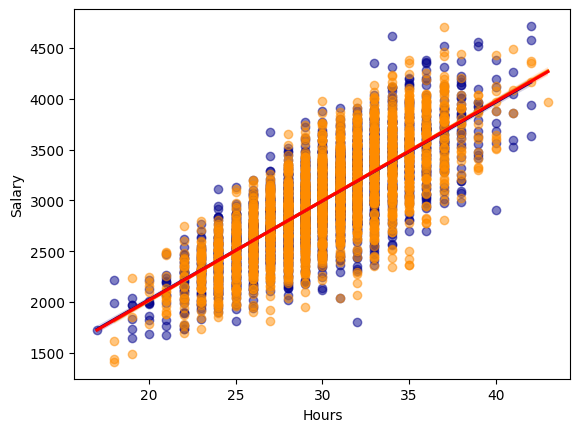

In [55]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

### Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [56]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_[0][0])

slope: 97.7


### Task

Now edit the code to simulate each of the following scenarios:

a) the salary of women is reduced by 200 euros ("direct discrimination")

b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45), no changes in per-hour salary ("no discrimination")

c) both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios.

Based on this experiment, answer the following questions:
1. In which of the scenarios the slope (coefficient) of the regression model changes?
2. How could you model the data in a way that enables you to detect indirect discrimination? _Hint_: Should you include the protected characteristic in the model or not?

To answer the second question, demonstrate your solution by building a regression model and interpreting the estimated coefficients.

**Submit this exercise by submitting your code and your answers to the above questions as comments on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

ANSWERS:
1. The slope changes in Scenarios A (Direct Discrimination) and C (Indirect Discrimination).
In A, because women's salaries are reduced by a fixed amount regardless of hours worked.
In C, because of the combination of changes affecting both hours for one gender and salary for the other.
2. We could build a regression model including both work working hours and gender as variables, see the code below:

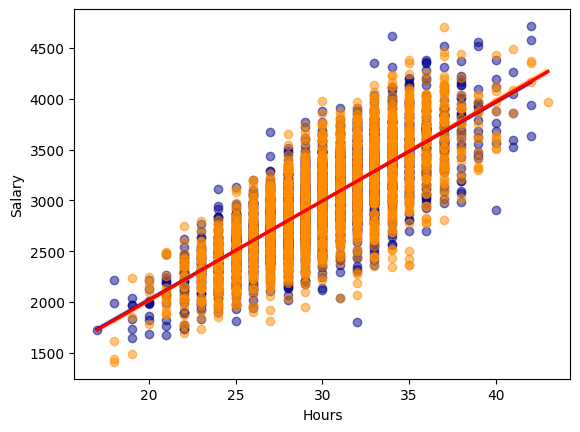

Intercept: 64.32
Coefficient for Hours: 97.73
Coefficient for Gender: -1.96


In [57]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

#sample size n
n = 5000

# Gender: 0 = men, 1 = women
data['Gender'] = data['Gender'].astype(int)  # Gender as integer

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

# Prepare the feature matrix and response variable
x = data[['Hours', 'Gender']]  # Features
y = data['Salary']  # Target variable

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})
sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")
plt.show()

# Fit the model
reg_with_gender = LinearRegression().fit(x, y)

# Print the coefficients
print("Intercept: %.2f" % reg_with_gender.intercept_)
print("Coefficient for Hours: %.2f" % reg_with_gender.coef_[0])
print("Coefficient for Gender: %.2f" % reg_with_gender.coef_[1])

1. Intercept: Represents the expected salary, when both Hours and Gender are 0 (at baseline).
2. Coefficient for Hours: Close to 100, adding 1 hour adds salary by 100.
2. Coefficient for Gender: Average difference in salary between women and men after considering the working hours. If negative, women earn less than men, if positive, women earn more than men, when the working hours are similar.

## Exercise 3 | Ethics case study

Go to Nitin Sawhney's Miro board: https://miro.com/app/board/uXjVLZORjwk=/

Navigate to the part where it says "Let's dive into some specific cases", and pick one of the six cases to work on (Frames 6-11).

For the case of your choice, answer the four questions that you can find in the boxes below (Frames 13-18).

Don't write your answers on the Miro board but on a **separate document which you can submit to us as PDF**.